---

# Importing Libraries

In [1]:
# Basic packages
import pandas as pd
import numpy as np
import scipy as spy
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

# Data ingestion

In [3]:
# Load dataset
data = pd.read_csv("InsuranceBusinessStats.csv")

---

## Preview dataset

In [4]:
# Preview the dataset
# View the first 5, last 5 and random 10 rows
print('First five rows', '--'*55)
display(data.head())

print('Last five rows', '--'*55)
display(data.tail())

print('Random ten rows', '--'*55)
np.random.seed(1)

display(data.sample(n=10))

First five rows --------------------------------------------------------------------------------------------------------------


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Last five rows --------------------------------------------------------------------------------------------------------------


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Random ten rows --------------------------------------------------------------------------------------------------------------


,age,sex,bmi,children,smoker,region,charges
559,19,male,35.530,0,no,northwest,1646.42970
1087,57,male,31.540,0,no,northwest,11353.22760
1020,51,male,37.000,0,no,southwest,8798.59300
460,49,female,36.630,3,no,southeast,10381.47870
802,21,male,22.300,1,no,southwest,2103.08000
298,31,male,34.390,3,yes,northwest,38746.35510
481,49,male,37.510,2,no,southeast,9304.70190
616,56,female,28.595,0,no,northeast,11658.11505
763,27,male,26.030,0,no,northeast,3070.80870
750,37,female,26.400,0,yes,southeast,19539.24300


**Initial observations**
* `sex`, `smoker` & `region` are categorical variables.
* `age`, `bmi`, `children` & `charges` are numerical variables.

----

## Variable List

In [5]:
# Display list of variables in dataset
variable_list = data.columns.tolist()
print(variable_list)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


---

## Dataset shape

In [6]:
shape = data.shape
n_rows = shape[0]
n_cols = shape[1]
print(f"The Dataframe consists of '{n_rows}' rows and '{n_cols}' columns")

The Dataframe consists of '1338' rows and '7' columns


---

## Data info

In [7]:
# Get info of the dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations**
* All columns have values as there are `1338` rows and each column has `1338 non-null` elements
* `sex`, `smoker` & `region` have the **object** datatype. They should be categorical values.

---

**Panda Object Variable states**

In [8]:
# Panda Object Variable states function

def pandas_object_states(data):
    """
    This function checks if the variable type is pandas Object and
    displays the states and counts of each
    """
    # Loop through all variables
    for var in data.columns:
        # Check for pandas Object type
        if data[var].dtypes == "object":
            print('Unique values in', var, 'are :')
            print(data[var].value_counts().sort_index())
            print('--'*55)

In [9]:
# Check the states of all pandas Object variables
pandas_object_states(data)

Unique values in sex are :
sex
female    662
male      676
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in smoker are :
smoker
no     1064
yes     274
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in region are :
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------


---

**Convert Pandas Objects to Category type**

In [10]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category") 

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


**Missing value summary function**

In [11]:
def missing_val_chk(data):
    """
    This function to checks for missing values 
    and generates a summary.
    """
    if data.isnull().sum().any() == True:
        # Number of missing in each column
        missing_vals = pd.DataFrame(data.isnull().sum().sort_values(
            ascending=False)).rename(columns={0: '# missing'})

        # Create a percentage missing
        missing_vals['percent'] = ((missing_vals['# missing'] / len(data)) *
                                   100).round(decimals=3)

        # Remove rows with 0
        missing_vals = missing_vals[missing_vals['# missing'] != 0].dropna()

        # display missing value dataframe
        print("The missing values summary")
        display(missing_vals)
    else:
        print("There are NO missing values in the dataset")

**Missing Values Check**

In [12]:
#Applying the missing value summary function
missing_val_chk(data)

There are NO missing values in the dataset


---

**Duplicate row check function**

In [13]:
def df_duplicate_removal(data):
    """
    This function checks if there are any duplicated rows in the dataframe.
    If any, it displays the rows, keep the first occurence and drops the 
    duplicates.

    The new dataframe shape is calculated and returned
    """
    # Check if duplicated rows exist
    if any(data.duplicated() == True):
        print("The following is/are the duplicated row(s) in the dataframe")
        # Displays the duplicated row(s)
        display(data[data.duplicated() == True])
        # Drops the duplicates inplace while keeping the first occurence
        data.drop_duplicates(keep="first", inplace=True)

        # Check and returns the shape of the new dataframe
        new_df_shape = data.shape
        n_rows = new_df_shape[0]
        n_cols = new_df_shape[1]
        print(
            f"The new dataframe  consists of '{n_rows}' rows and '{n_cols}' columns")
    else:
        print("There is/are no duplicated row(s) in the dataframe")

In [14]:
df_duplicate_removal(data)

The following is/are the duplicated row(s) in the dataframe


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


The new dataframe  consists of '1337' rows and '7' columns


## 5 Point Summary

**Numerical type Summary**

In [15]:
# Five point summary of all numerical type variables in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


**Categorical type Summary**

In [16]:
data.describe(include=['category']).T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


**Observations**
* `sex` has **2** unique categories.  
    * `male` has the highest frequency. 
    
    
* `smoker` has **2** unique categories.  
    * `no` has the highest frequency.  
    
    
* `region` has **4** unique categories.  
    * `southeast` has the highest frequency.

---

**Create independent sub-lists to separate Numerical and Categorical variables for EDA**

In [17]:
# Select numeric variables
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
# Select categorical variables
categorical_columns = data.select_dtypes(include=['category']).columns.tolist()

---

## Numerical data

**Skew Summary**

In [18]:
# Display the skew summary for the numerical variables
for var in data[numeric_columns].columns:
    var_skew = data[var].skew()
    if var_skew > 1:
        print(f"The '{var}' distribution is highly right skewed.\n")
    elif var_skew < -1:
        print(f"The '{var}' distribution is highly left skewed.\n")
    elif (var_skew > 0.5) & (var_skew < 1):
        print(f"The '{var}' distribution is moderately right skewed.\n")
    elif (var_skew < -0.5) & (var_skew > -1):
        print(f"The '{var}' distribution is moderately left skewed.\n")
    else:
        print(f"The '{var}' distribution is fairly symmetrical.\n")

The 'age' distribution is fairly symmetrical.

The 'bmi' distribution is fairly symmetrical.

The 'children' distribution is moderately right skewed.

The 'charges' distribution is highly right skewed.



**Outlier check function**

In [19]:
# Outlier check
def outlier_count(data):
    """
    This function checks the lower and upper 
    outliers for all numerical variables.

    Outliers are found where data points exists either:
    - Greater than `1.5*IQR` above the 75th percentile
    - Less than `1.5*IQR` below the 25th percentile
    """
    numeric = data.select_dtypes(include=np.number).columns.to_list()
    for i in numeric:
        # Get name of series
        name = data[i].name
        # Calculate the IQR for all values and omit NaNs
        IQR = spy.stats.iqr(data[i], nan_policy="omit")
        # Calculate the boxplot upper fence
        upper_fence = data[i].quantile(0.75) + 1.5 * IQR
        # Calculate the boxplot lower fence
        lower_fence = data[i].quantile(0.25) - 1.5 * IQR
        # Calculate the count of outliers above upper fence
        upper_outliers = data[i][data[i] > upper_fence].count()
        # Calculate the count of outliers below lower fence
        lower_outliers = data[i][data[i] < lower_fence].count()
        # Check if there are no outliers
        if (upper_outliers == 0) & (lower_outliers == 0):
            continue
        print(
            f"The '{name}' distribution has '{lower_outliers}' lower outliers and '{upper_outliers}' upper outliers.\n"
        )

In [20]:
#Applying the Outlier check function for the sub-dataframe of numerical variables
outlier_count(data[numeric_columns])

The 'bmi' distribution has '0' lower outliers and '9' upper outliers.

The 'charges' distribution has '0' lower outliers and '139' upper outliers.



---

## Categorical data

**Unique states**

In [21]:
# Display the unique values for all categorical variables
for i in categorical_columns:
    print('Unique values in', i, 'are :')
    print(data[i].value_counts())
    print('--'*55)

Unique values in sex are :
sex
male      675
female    662
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in smoker are :
smoker
no     1063
yes     274
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in region are :
region
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------


---

# Heat Map

Create sub-dataframe removing binned numerical variables

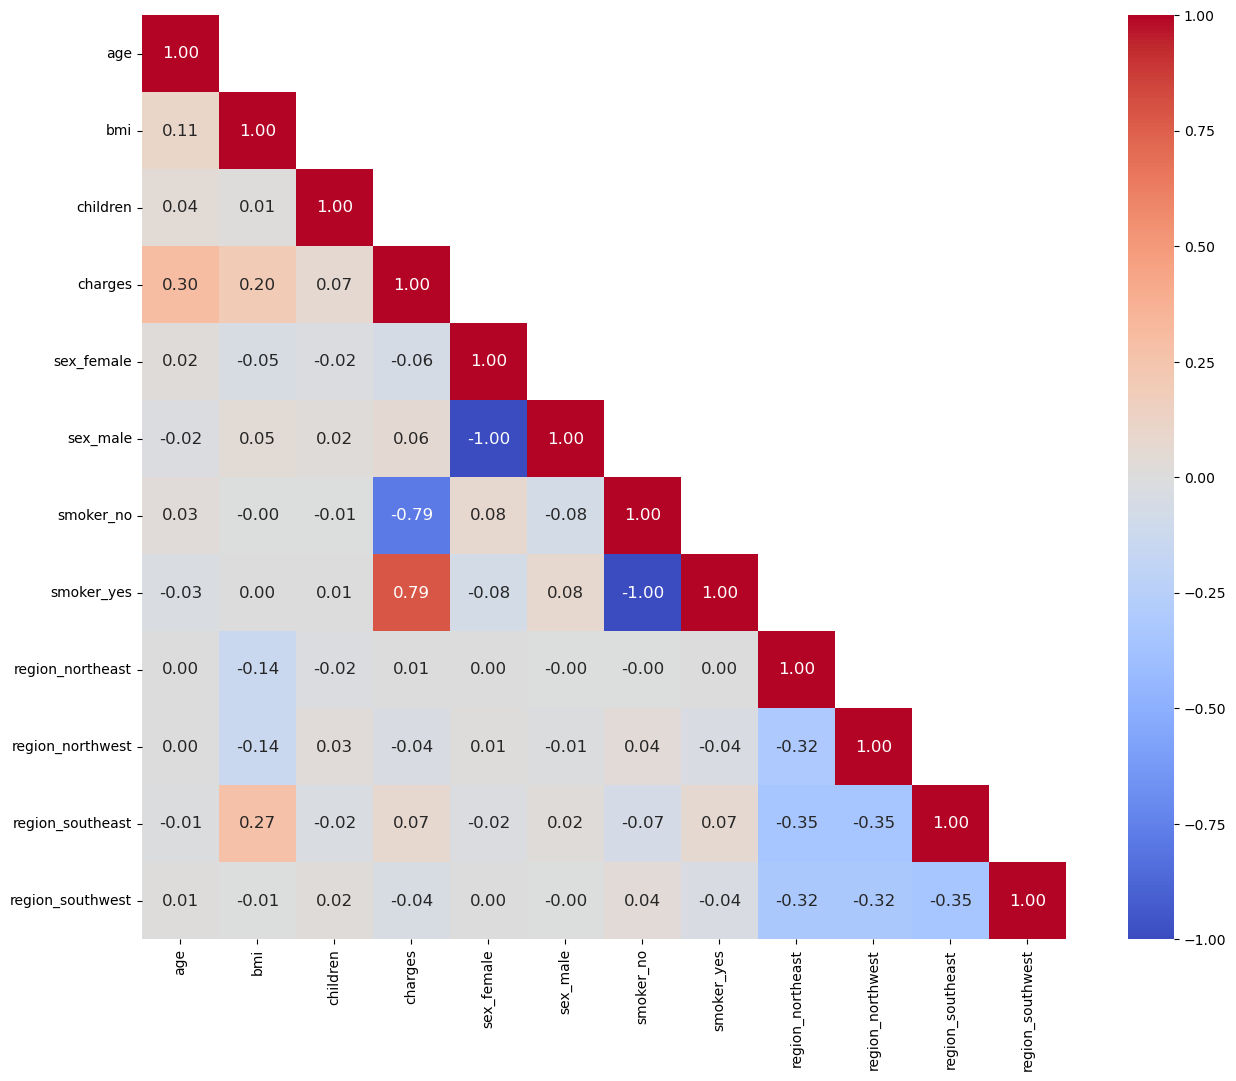

In [22]:
onehot = pd.get_dummies(data,
                        columns=data.select_dtypes(include=['category']).columns.tolist())
oh_corr = onehot.corr()

annot_kws = {"fontsize": 12}

symmetric_matrix = (oh_corr + oh_corr.T) / 2

# Create a mask for the upper half of the matrix
mask = np.triu(np.ones_like(symmetric_matrix), k=1)

plt.figure(figsize=(16, 12))
sns.heatmap(oh_corr, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', square=True, annot_kws=annot_kws)
plt.yticks(rotation=0)
plt.show()

**Observations:**
* `Age` has a positive correlation with `Charges` which indicates that as the customers get older they file more medical claims.
* `BMI` has positive but weak correlations with `Charges` and `SouthEast region`.
* `Non-smokers` file lower medical claims than `Smokers`. This is observed by the highly positive correlation between `Charges` and `Smokers` while there is also a highly negative correlation between `Charges` and `Non-smokers`.

---

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Charges vs Age

**Relationship between Charges and Age with Smoker**

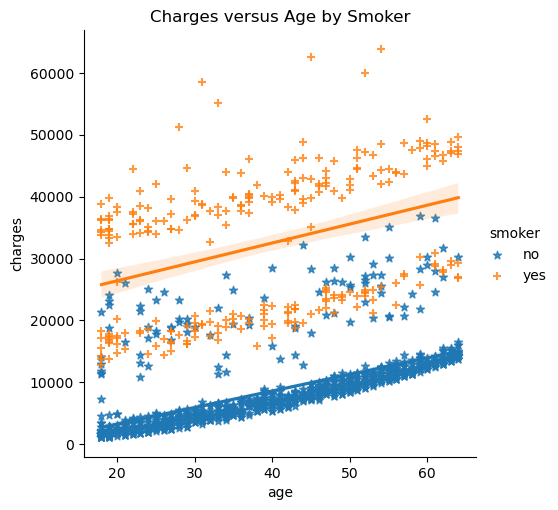

In [23]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, markers=["*", "+"])
plt.title("Charges versus Age by Smoker")
plt.show()

**Observations:**
* Customers who are `smokers` file higher medical insurance claims than `non-smokers`.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Charges vs BMI

**Relationship between Charges and BMI with Smoker**

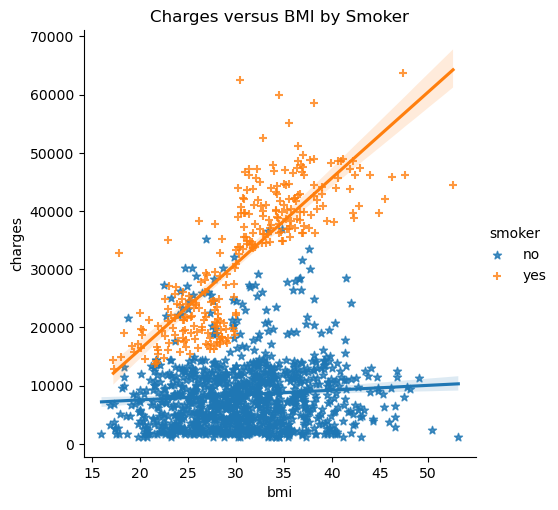

In [24]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, markers=["*", "+"]);
plt.title("Charges versus BMI by Smoker")
plt.show();

**Observations:**
* As a customer's BMI increases, the magnitude of the medical claims filed significantly increases if they are a `smoker` as well.
* For `non-smokers`, as the customer's BMI increases there isn't any significant change at all in the size of the medical claims filed.


---

# Feature Engineering

Binning Continuous data into Categorical Data

**Categorizing Age**

Let's categorize the **AGE** into groups for analysis
Let's split age into the following groups:
1. Young Adults (ages 18-34)
2. Middle Age (ages 35-54)
3. Senior Adults (ages 55-64)

In [25]:
# Define the age bins and labels
age_bins = [18, 35, 55, 64]
age_label = ["Young Adults", "Middle Aged", "Senior Adults"]
# Create a new column with age categories
data['AgeGroup'] = pd.cut(
    data['age'], bins=age_bins, include_lowest=True, right=False, labels=age_label)

**Categorizing BMI**

Let's categorize the **BMI** into groups for analysis
Let's split bmi into the following groups:
1. Under Weight (bmi < 18.5)
2. Ideal BMI (bmi 18.5-24.9)
3. Over Weight (bmi 25-29.9)
4. Obese (bmi > 30)

In [26]:
# Define the age bins and labels
bmi_bins = [0, 18.5, 25, 30, 99]
bmi_label = ["Under Weight", "Ideal BMI", "Over Weight", "Obese"]
# Create a new column with age categories
data['bmi_groups'] = pd.cut(
    data.bmi, bmi_bins, include_lowest=True, right=False, labels=bmi_label)

---

Create sub-dataframe removing binned numerical variables

In [27]:
data_binned = data.drop(columns=["age", 'bmi'])

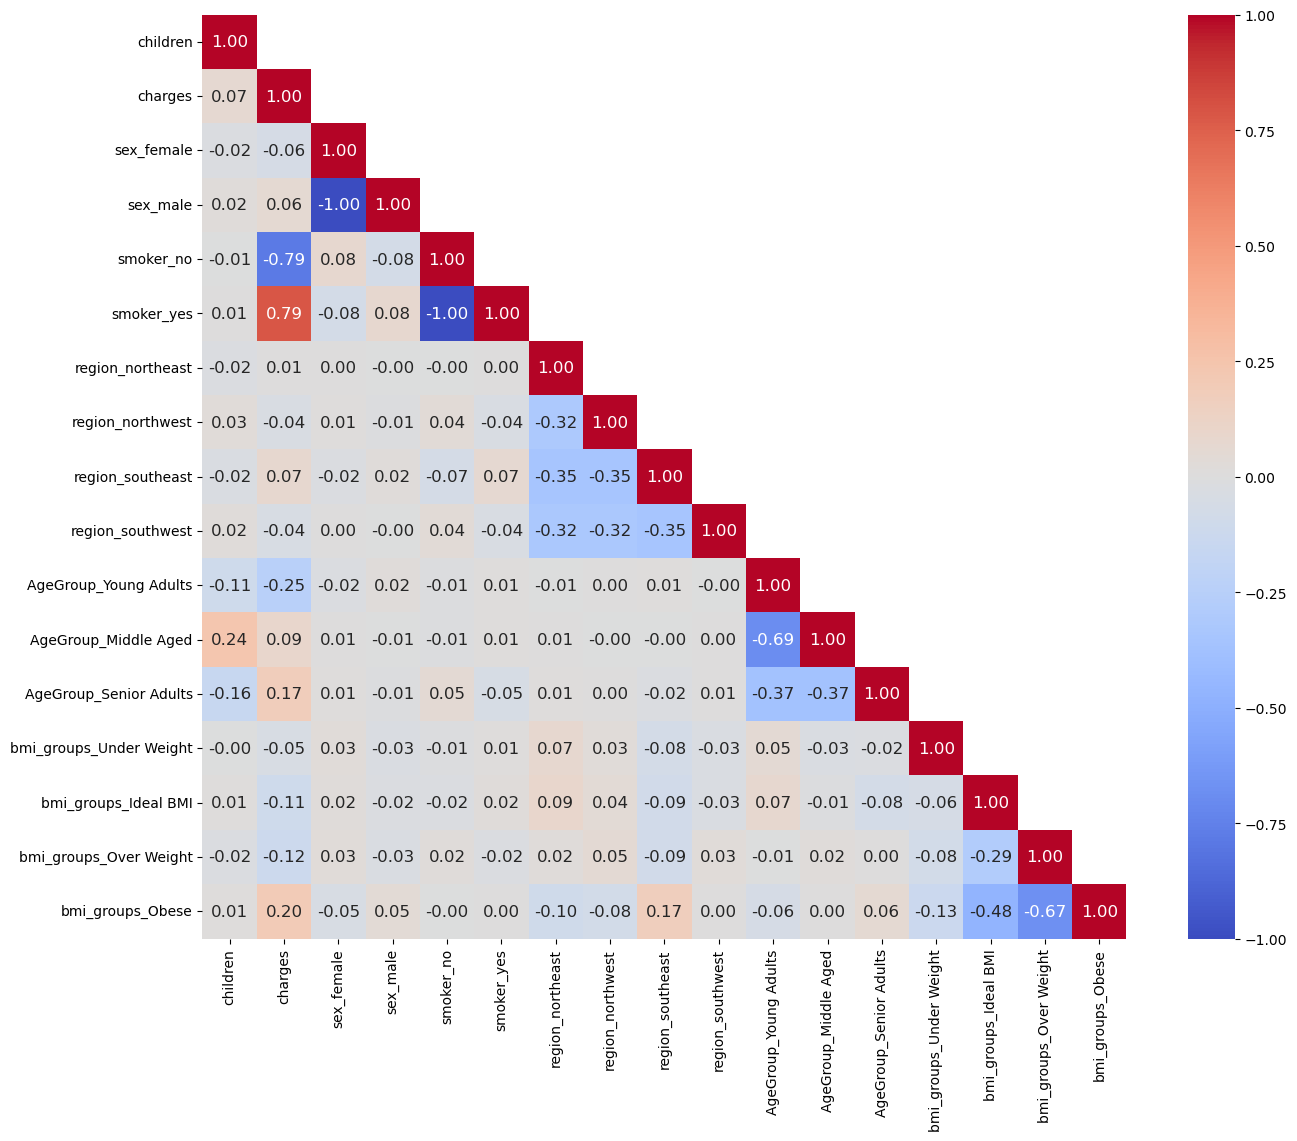

In [28]:
onehot = pd.get_dummies(data_binned,
                        columns=data_binned.select_dtypes(include=['category']).columns.tolist())
oh_corr = onehot.corr()

annot_kws = {"fontsize": 12}

symmetric_matrix = (oh_corr + oh_corr.T) / 2

# Create a mask for the upper half of the matrix
mask = np.triu(np.ones_like(symmetric_matrix), k=1)

plt.figure(figsize=(16, 12))
sns.heatmap(oh_corr, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', square=True, annot_kws=annot_kws)
plt.yticks(rotation=0)
plt.show()

---

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

**Histogram Overview**

In [29]:
def histogram_overview(data):
    """
    Histogram Overview function
    
    This function below generates a subplots of  `histogram plots` & 
    showing the `distribution of the numerical varible input`
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

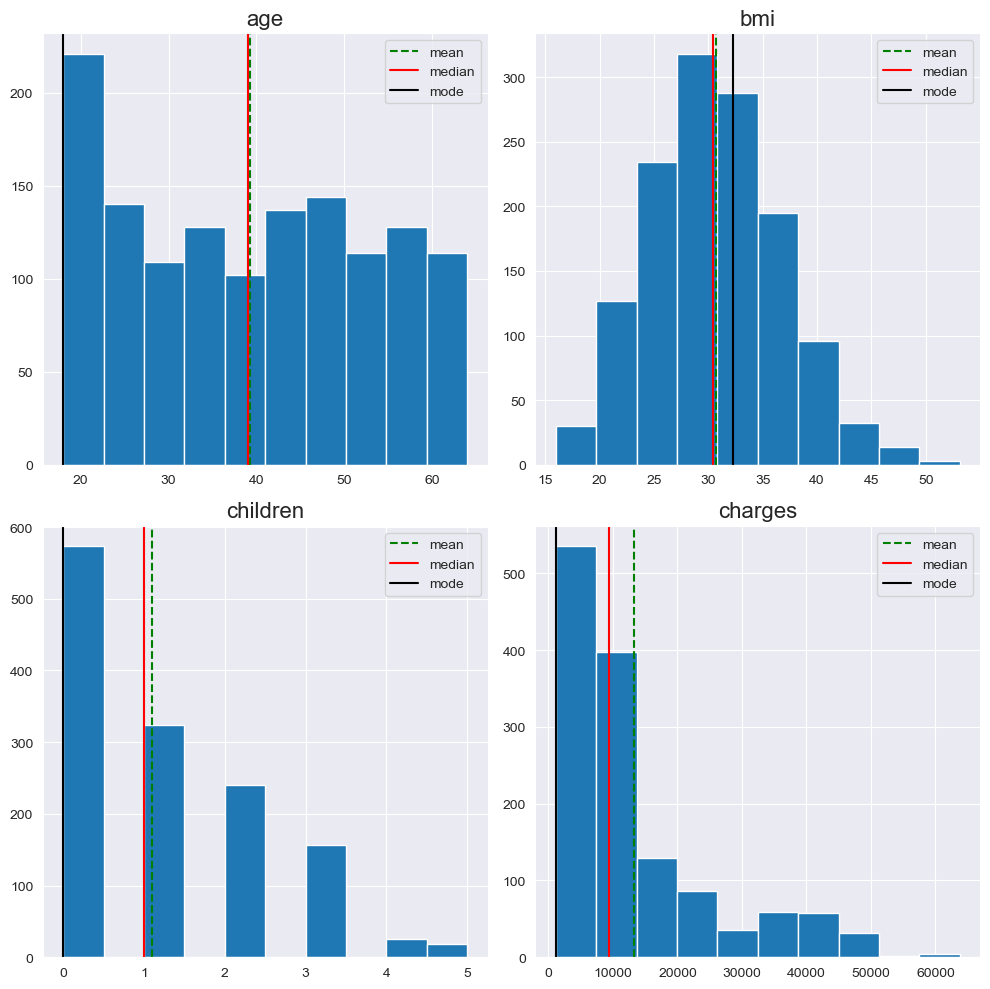

In [30]:
histogram_overview(data)

**Boxplot overview**

In [31]:
def boxplot_overview(data):
    """
    This function below generates a subplots of `box plots` &
    showing the `distribution of the numerical variable input with outliers`.

    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    """

    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)) )  
        # Subplot no of rows
        subplot_nrows = math.ceil(len(num_vars) / subplot_ncols)  
          
        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

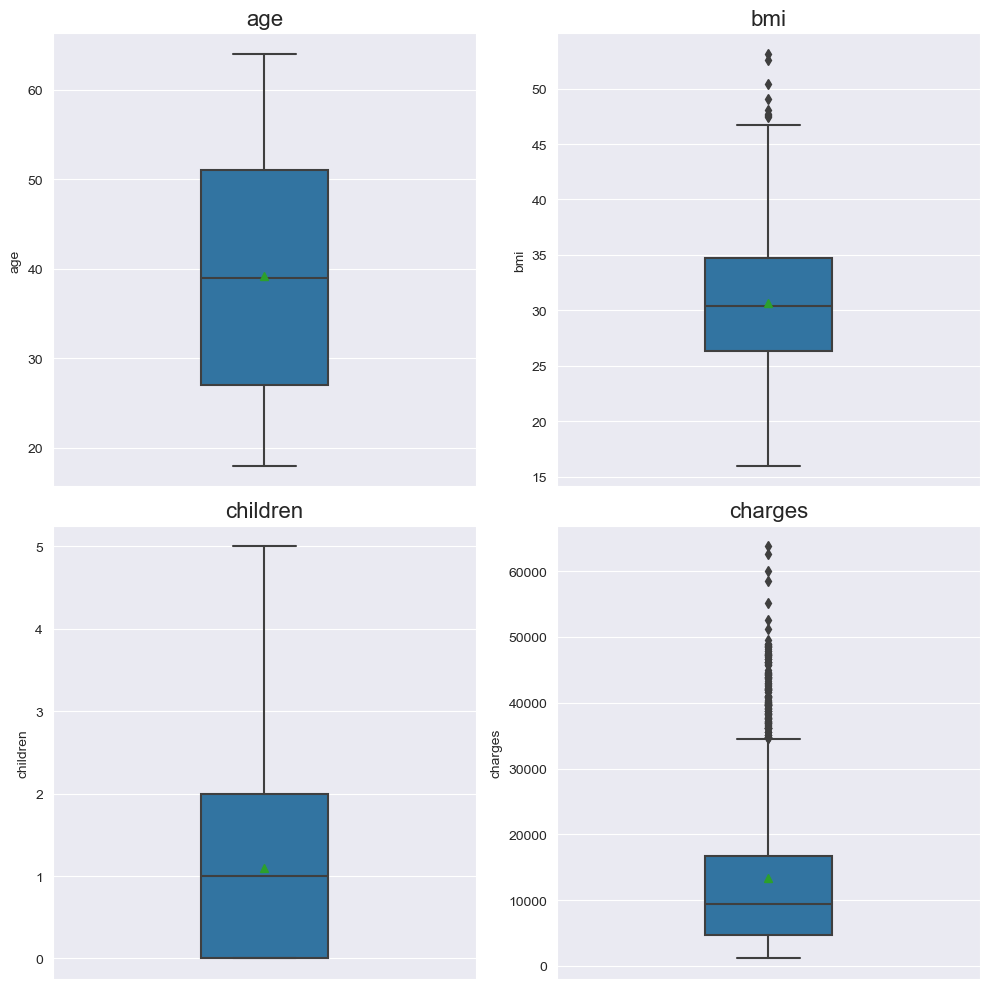

In [32]:
boxplot_overview(data)

### Categorical Variables

In [33]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and 
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to 
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """

    # Create a horizontal count plot while sorting variables in descending order
    g = sns.countplot(y=data, order = data.astype(str).value_counts().index)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data)
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size=12)
        plt.title("Distribution of {}".format(
            data.name), loc="center", fontsize=22)
    plt.show()
    # Line separator
    print('--'*55)

In [34]:
data.select_dtypes(exclude = np.number).columns.to_list()

['sex', 'smoker', 'region', 'AgeGroup', 'bmi_groups']

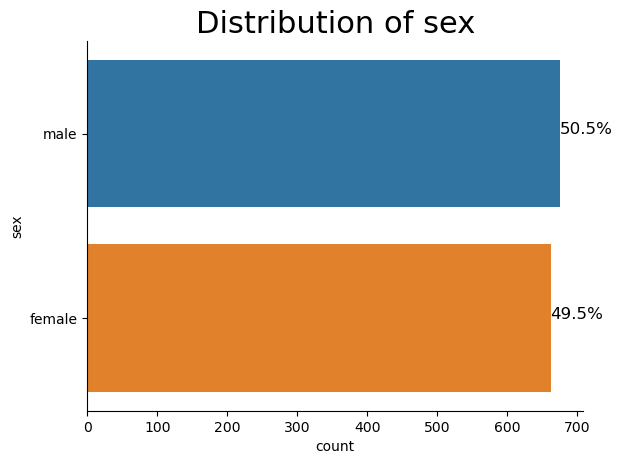

--------------------------------------------------------------------------------------------------------------


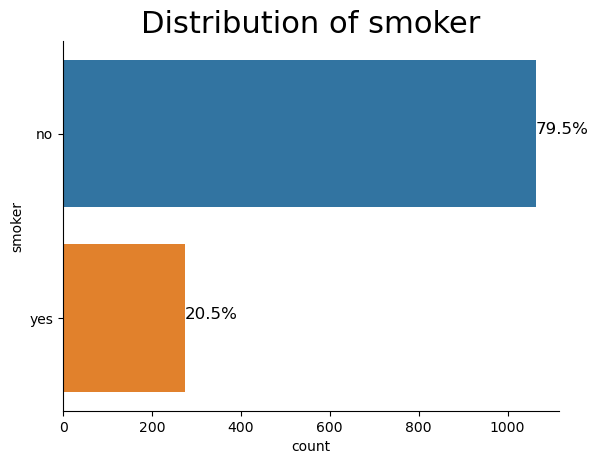

--------------------------------------------------------------------------------------------------------------


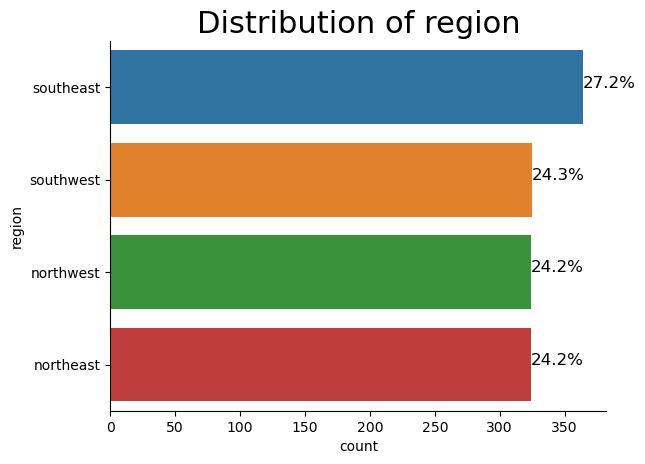

--------------------------------------------------------------------------------------------------------------


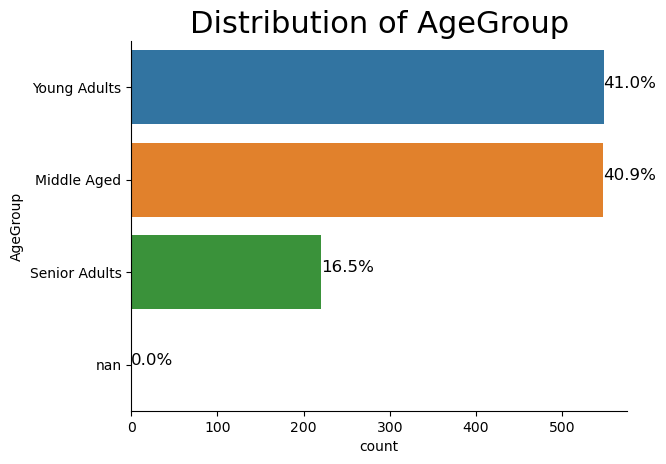

--------------------------------------------------------------------------------------------------------------


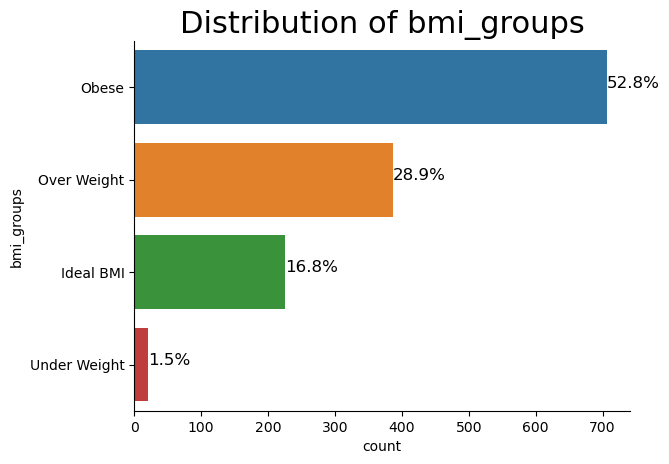

--------------------------------------------------------------------------------------------------------------


In [35]:
for each_var in data.select_dtypes(exclude = np.number).columns.to_list():
    plt.figure()
    bar_chart(data=data[each_var])

---

---